In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import re

In [3]:
data=pd.read_csv("Final_result.csv")

In [4]:
data

,Unnamed: 0,Building_Name,Building_type,Constructed_by,Price_in_cr,Location,Area_sq_ft,House_size,Prices_per_sqft,Building_Status
0,0,Vajra The Royal Park,Apartment,Vajra Builders And DevelopersBUILDER0,4.47,"Bowrampet, Hyderabad",1535,3,"4,200",Under Construction
1,1,Vasavi Signature,Apartment,Vasavi GroupBUILDER0,1.82,"Kukatpally, Hyderabad",2285,3,"8,000",Ready to move
2,2,Riddhi Pramukh Elegance,Apartment,Riddhi GroupBUILDER0,7.58,"Jeedimetla, Hyderabad",1510,3,"5,800",Under Construction
3,3,Theme Imperial,Apartment,Theme Ambience InfrastructuresBUILDER0,1.80,"Attapur, Hyderabad",2655,4,"6,800",Under Construction
4,4,Signature Altius,Apartment,Signature AvenuesBUILDER0,1.21,"Kollur, Hyderabad",2425,3,"4,999",Under Construction
...,...,...,...,...,...,...,...,...,...,...
415,415,GHR Callisto,Apartment,GHR InfraBUILDER0,2.12,"Kollur, Hyderabad",1195,2,"5,199",Under Construction
416,416,Dinesh Auric,Apartment,Dinesh ProjectsBUILDER0,9.86,"Bachupally, Hyderabad",1039,2,"4,804",Under Construction
417,417,Namishree BPS Twin Towers,Apartment,Namishree Infrastructure And Project Pvt LtdBU...,1.02,"Saidabad, Hyderabad",1705,3,"6,000",Under Construction
418,418,Om Sree Gallaxy,Apartment,Om Sree Builders And DevelopersBUILDER0,8.41,"Gundlapochampally, Hyderabad",1285,2,"6,102",Under Construction


In [5]:
data.drop(["Unnamed: 0"],axis=1,inplace=True)

In [6]:
p1=[]
for i in data["Prices_per_sqft"]:
    p1.append(i.replace(",",""))

In [7]:
data["Prices_per_sqft"]=p1

In [8]:
data

,Building_Name,Building_type,Constructed_by,Price_in_cr,Location,Area_sq_ft,House_size,Prices_per_sqft,Building_Status
0,Vajra The Royal Park,Apartment,Vajra Builders And DevelopersBUILDER0,4.47,"Bowrampet, Hyderabad",1535,3,4200,Under Construction
1,Vasavi Signature,Apartment,Vasavi GroupBUILDER0,1.82,"Kukatpally, Hyderabad",2285,3,8000,Ready to move
2,Riddhi Pramukh Elegance,Apartment,Riddhi GroupBUILDER0,7.58,"Jeedimetla, Hyderabad",1510,3,5800,Under Construction
3,Theme Imperial,Apartment,Theme Ambience InfrastructuresBUILDER0,1.80,"Attapur, Hyderabad",2655,4,6800,Under Construction
4,Signature Altius,Apartment,Signature AvenuesBUILDER0,1.21,"Kollur, Hyderabad",2425,3,4999,Under Construction
...,...,...,...,...,...,...,...,...,...
415,GHR Callisto,Apartment,GHR InfraBUILDER0,2.12,"Kollur, Hyderabad",1195,2,5199,Under Construction
416,Dinesh Auric,Apartment,Dinesh ProjectsBUILDER0,9.86,"Bachupally, Hyderabad",1039,2,4804,Under Construction
417,Namishree BPS Twin Towers,Apartment,Namishree Infrastructure And Project Pvt LtdBU...,1.02,"Saidabad, Hyderabad",1705,3,6000,Under Construction
418,Om Sree Gallaxy,Apartment,Om Sree Builders And DevelopersBUILDER0,8.41,"Gundlapochampally, Hyderabad",1285,2,6102,Under Construction


In [9]:
p1=[]
for i in data["Location"]:
    p1.append(i.replace("Hyderabad",""))

In [10]:
 data["Location"]=p1

In [11]:
p2=[]
for i in data["Location"]:
    p2.append(i.replace(",",""))

In [12]:
data["Location"]=p2

In [13]:
p3=[]
for i in data["Constructed_by"]:
    p3.append(i.replace("BUILDER0",""))

In [14]:
data["Constructed_by"]=p3

In [15]:
data

,Building_Name,Building_type,Constructed_by,Price_in_cr,Location,Area_sq_ft,House_size,Prices_per_sqft,Building_Status
0,Vajra The Royal Park,Apartment,Vajra Builders And Developers,4.47,Bowrampet,1535,3,4200,Under Construction
1,Vasavi Signature,Apartment,Vasavi Group,1.82,Kukatpally,2285,3,8000,Ready to move
2,Riddhi Pramukh Elegance,Apartment,Riddhi Group,7.58,Jeedimetla,1510,3,5800,Under Construction
3,Theme Imperial,Apartment,Theme Ambience Infrastructures,1.80,Attapur,2655,4,6800,Under Construction
4,Signature Altius,Apartment,Signature Avenues,1.21,Kollur,2425,3,4999,Under Construction
...,...,...,...,...,...,...,...,...,...
415,GHR Callisto,Apartment,GHR Infra,2.12,Kollur,1195,2,5199,Under Construction
416,Dinesh Auric,Apartment,Dinesh Projects,9.86,Bachupally,1039,2,4804,Under Construction
417,Namishree BPS Twin Towers,Apartment,Namishree Infrastructure And Project Pvt Ltd,1.02,Saidabad,1705,3,6000,Under Construction
418,Om Sree Gallaxy,Apartment,Om Sree Builders And Developers,8.41,Gundlapochampally,1285,2,6102,Under Construction


In [16]:
## type casting
data["Prices_per_sqft"]=data["Prices_per_sqft"].astype("int")

In [17]:
data.describe(include="O")

,Building_Name,Building_type,Constructed_by,Location,Building_Status
count,420,420,420,420,420
unique,20,2,20,16,2
top,Vajra The Royal Park,Apartment,Vajra Builders And Developers,Kollur,Under Construction
freq,21,399,21,63,399


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Building_Name    420 non-null    object 
 1   Building_type    420 non-null    object 
 2   Constructed_by   420 non-null    object 
 3   Price_in_cr      420 non-null    float64
 4   Location         420 non-null    object 
 5   Area_sq_ft       420 non-null    int64  
 6   House_size       420 non-null    int64  
 7   Prices_per_sqft  420 non-null    int32  
 8   Building_Status  420 non-null    object 
dtypes: float64(1), int32(1), int64(2), object(5)
memory usage: 28.0+ KB


In [19]:
data.columns

Index(['Building_Name', 'Building_type', 'Constructed_by', 'Price_in_cr',
       'Location', 'Area_sq_ft', 'House_size', 'Prices_per_sqft',
       'Building_Status'],
      dtype='object')

In [20]:
data.describe(include ='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Building_Name,420,20,Vajra The Royal Park,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Building_type,420,2,Apartment,399,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Constructed_by,420,20,Vajra Builders And Developers,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price_in_cr,420.0,NaN,NaN,NaN,3.805,3.234803,1.02,1.21,1.97,5.3975,9.98
Location,420,16,Kollur,63,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Area_sq_ft,420.0,NaN,NaN,NaN,2134.95,1649.930284,1039.0,1408.75,1787.5,2287.25,9000.0
House_size,420.0,NaN,NaN,NaN,2.85,0.727158,2.0,2.0,3.0,3.0,5.0
Prices_per_sqft,420.0,NaN,NaN,NaN,6124.55,1809.882973,3499.0,4876.0,5650.0,6575.0,10334.0
Building_Status,420,2,Under Construction,399,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## univariate analysis

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [22]:
data["Building_Status"].value_counts()

Under Construction    399
Ready to move          21
Name: Building_Status, dtype: int64

In [23]:
a=pd.DataFrame(data["Building_Status"].value_counts())

In [24]:
a

,Building_Status
Under Construction,399
Ready to move,21


In [25]:
data["Location"].value_counts()

Kollur                63
Kukatpally            42
Kompally              42
Bowrampet             21
Jeedimetla            21
Attapur               21
Saroor Nagar          21
Dammaiguda            21
Sanath Nagar          21
Mallapur              21
Ameenpur              21
Harshaguda            21
Bachupally            21
Saidabad              21
Gundlapochampally     21
Nizampet              21
Name: Location, dtype: int64

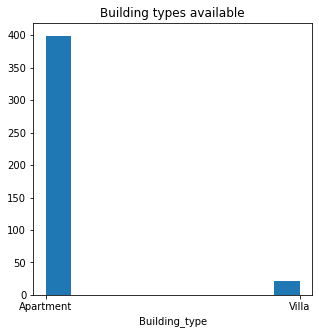

In [26]:
# step-1
plt.figure(figsize=(5,5))
plt.hist(data["Building_type"])
plt.title("Building types available")
plt.xlabel("Building_type")
plt.show()

* most of buildings are in Apartment type

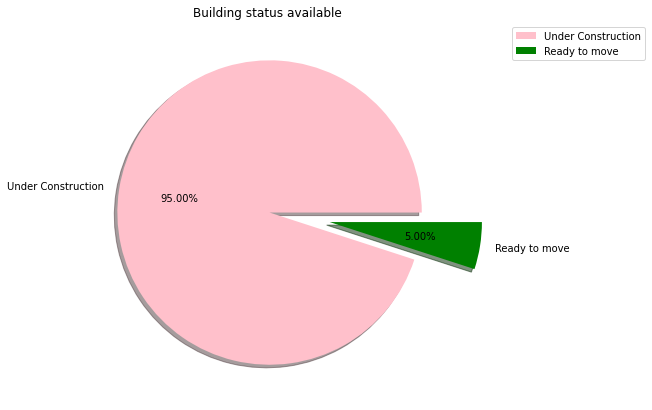

In [27]:
# step-2
plt.figure(figsize=(17,7))
a=pd.DataFrame(data["Building_Status"].value_counts())
explode=[0,0.4]
plt.pie(data["Building_Status"].value_counts(),labels=a.index,explode=explode,autopct="%1.2f%%",shadow=True,colors=["pink",'green'])
plt.title("Building status available ")
plt.legend(bbox_to_anchor=(1.5,1))
plt.show()

* Most of the buildings are in under construction status

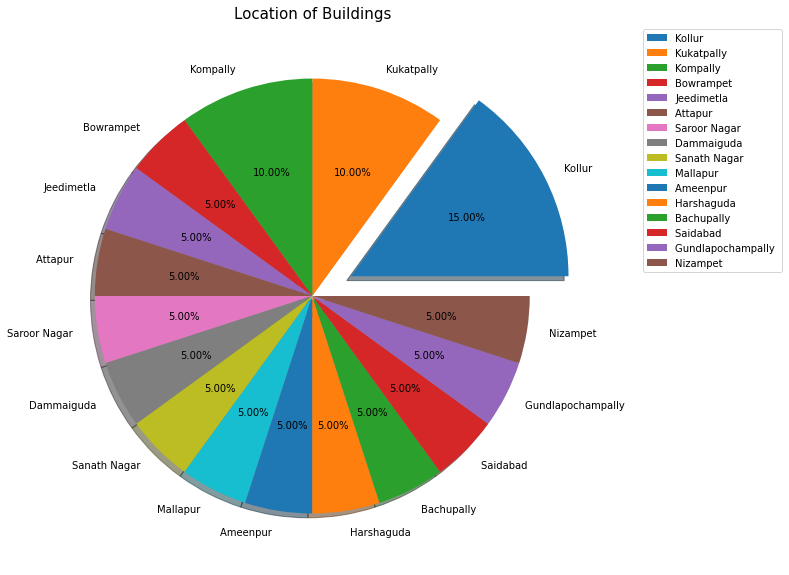

In [28]:
# step-3
plt.figure(figsize=(17,10))
x=pd.DataFrame(data["Location"].value_counts())
explode=[0.2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
plt.pie(data["Location"].value_counts(),labels=x.index,explode=explode,autopct="%1.2f%%",shadow=True)
plt.title("Location of Buildings",fontsize=(15))
plt.legend(bbox_to_anchor=(1.1,1))
plt.show()

* Kollur is having highest percentage of houses for sale about 15%
* Kompally and Kukkatpally has second highest percentage of houses for sale about 10%

### no of buildings available in location

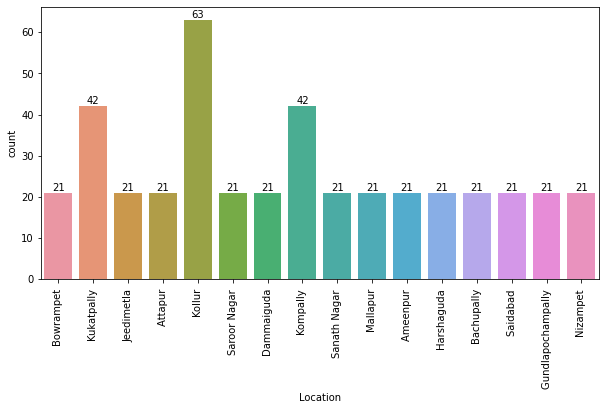

In [29]:
# step-4
plt.figure(figsize=(10,5))
ax=sns.countplot(x='Location',data=data)
plt.xticks(rotation=90)
for i in ax.containers:
    ax.bar_label(i)

* Kollur has 63 buildings for sale
* Kukkatpally and Kompally has 42 buildings for sale 
* Remaining locations are 21 builings for sale

### checking the density of Prices(cr)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


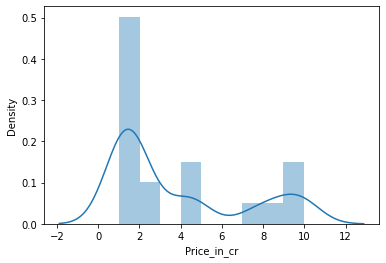

In [30]:
sns.distplot(data['Price_in_cr'])
plt.show()

 * most of building prices are below 2 crores

## Bivariate analysis

### categorical vs categorical

 #### Availability of Building type in Location

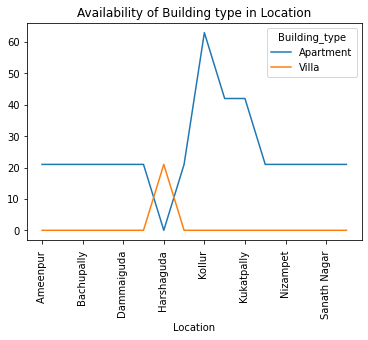

In [31]:
pd.crosstab(index=data["Location"],columns=data["Building_type"]).plot(kind="line")
plt.xticks(rotation=90)
plt.title("Availability of Building type in Location")
plt.show()

* Most of Apartments are available at Kollur and less no of apartments are available at Harshguda
* Villas are available only at Harshguda

### categorical vs numerical

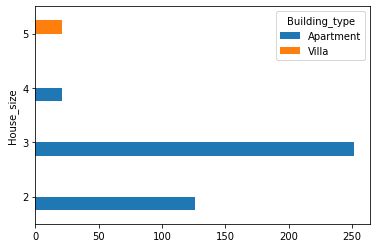

In [32]:
pd.crosstab(index=data.House_size,columns=data.Building_type).plot(kind="barh")
plt.show()

* most of 3bhk apartments are available

#### knowing the max and  min prices of house size

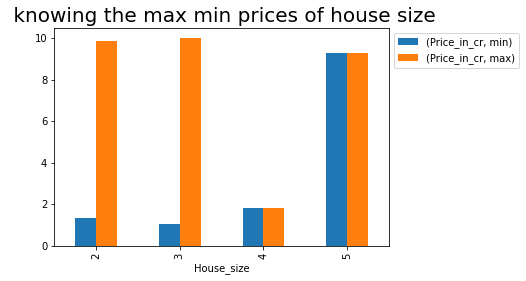

In [33]:
data.groupby(["House_size"]).agg({"Price_in_cr":["min","max"]}).plot(kind="bar")
plt.title(" knowing the max min prices of house size",fontsize=(20))
plt.legend(bbox_to_anchor=(1,1))
plt.show()

* 4bhk showing equal price about below 2 crores
* 5bhk showing the maximum price(>8cr) with no minimum price
* 2bhk and 3bhk showing the minimum, maximum prices 

#### Checking Prices for property type

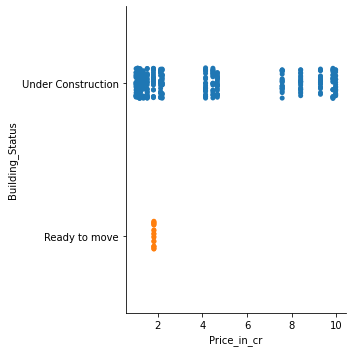

In [34]:
sns.catplot(x="Price_in_cr",y="Building_Status",data=data)
plt.show()

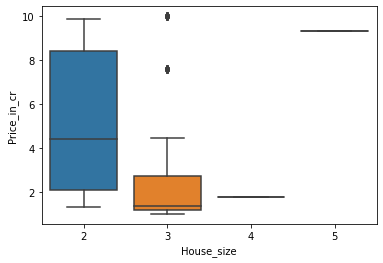

In [35]:
sns.boxplot(x="House_size",y="Price_in_cr",data=data)
plt.show()

* 

### Availability of House size in Building type

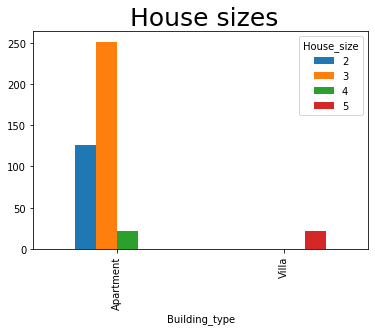

In [36]:
cs=pd.crosstab(data["Building_type"],data["House_size"])
cs.plot(kind="bar")
plt.title(" House sizes",fontsize=(25))
plt.show()

* Appartments are availble in 2,3,4 and 5bhk
* only 5bhk buildings are available in Villas

### Area(sqft) availability in Building type

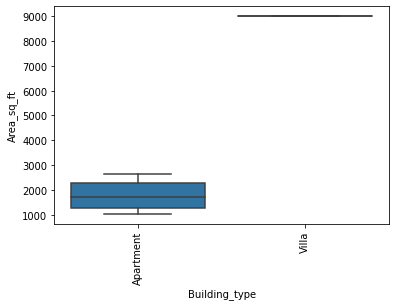

In [37]:
sns.boxplot(y='Area_sq_ft',x="Building_type",data=data)
plt.xticks(rotation=90)
plt.show()

* Most of the Apartment's area is in between 1000 to 3000 sqft

### Numerical vs Numerical

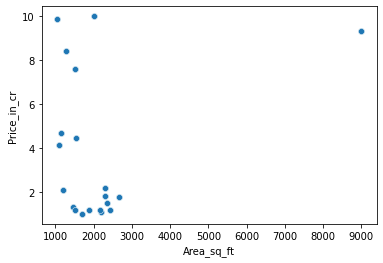

In [38]:
sns.scatterplot(x="Area_sq_ft",y="Price_in_cr",data=data)
plt.show()

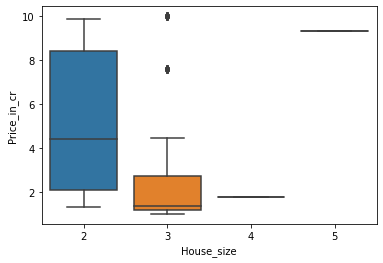

In [39]:
sns.boxplot(x='House_size',y="Price_in_cr",data=data)
plt.show()

* Price is high and large amount of Area avilable
* below 3k Sqft of area has price below 2crores

In [40]:
data["House_size"].value_counts()

3    252
2    126
4     21
5     21
Name: House_size, dtype: int64

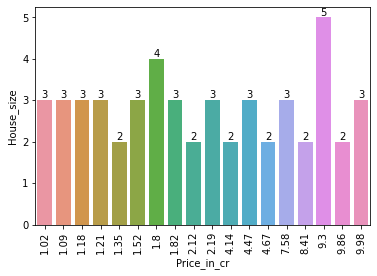

In [41]:
ax=sns.barplot(y="House_size",x="Price_in_cr",data=data)
for i in ax.containers:
    ax.bar_label(i)
plt.xticks(rotation=90)
plt.show()

* Large no of Buildings are Under construction and Prices are High
* less no of building are Read to move and prices are less 

#### Knowing the maximum and minimum prices of  House size in locations

<Figure size 720x288 with 0 Axes>

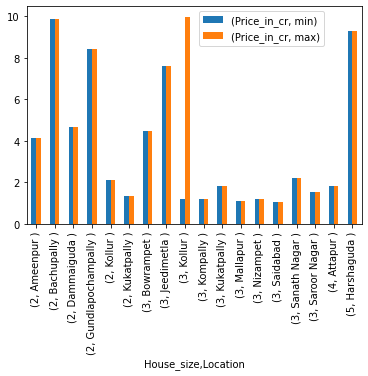

In [42]:
plt.figure(figsize=(10,4))
data.groupby(["House_size","Location"]).agg({"Price_in_cr":['min','max']}).plot(kind="bar")
plt.legend(bbox_to_anchor=(0.5,1))
plt.show()

### Percentage of construction on Location

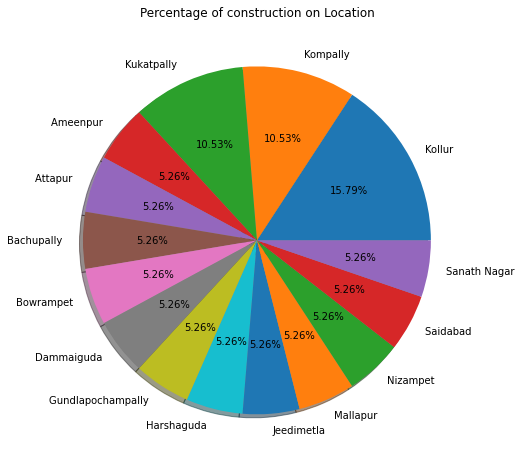

In [43]:
temp=pd.DataFrame({"Location":data["Location"]})
constructed=temp.value_counts()[0:15]
labels=[X[0] for X in constructed.keys()]
bar,ax=plt.subplots(figsize=(10,8))
ax=plt.pie(x=constructed,labels=labels,autopct="%0.2f%%",shadow=True)
plt.title("Percentage of construction on Location")
plt.show()

* Most of buildings were conctructed in Kollur about 15.79%

### Multivariate Analysis

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


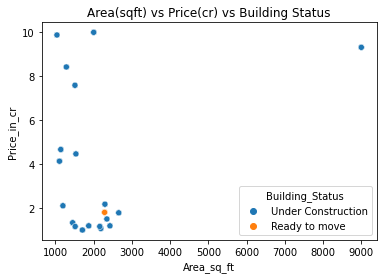

In [44]:
sns.scatterplot(data["Area_sq_ft"],data["Price_in_cr"],hue=data["Building_Status"])
plt.title("Area(sqft) vs Price(cr) vs Building Status")
plt.show()

* Most of the buildins are under construction 

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


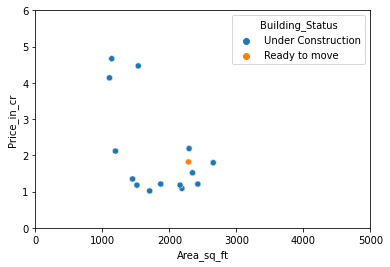

In [45]:
sns.scatterplot(data["Area_sq_ft"],data["Price_in_cr"],hue=data["Building_Status"])
plt.xlim(0,5000)
plt.ylim(0,6)
plt.show()

* here Villa has more price about nearly 10 crores and has 9k sq ft above
* Appartments have the area below the 3k sq ft and cost also showing the less compere to Villa


In [46]:
data.describe()

,Price_in_cr,Area_sq_ft,House_size,Prices_per_sqft
count,420.000000,420.000000,420.000000,420.000000
mean,3.805000,2134.950000,2.850000,6124.550000
std,3.234803,1649.930284,0.727158,1809.882973
min,1.020000,1039.000000,2.000000,3499.000000
25%,1.210000,1408.750000,2.000000,4876.000000
50%,1.970000,1787.500000,3.000000,5650.000000
75%,5.397500,2287.250000,3.000000,6575.000000
max,9.980000,9000.000000,5.000000,10334.000000


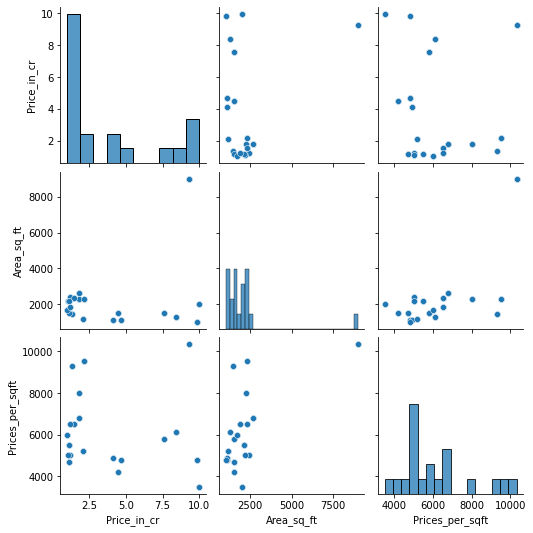

In [47]:
sns.pairplot(data[["Price_in_cr","Area_sq_ft","Prices_per_sqft"]])
plt.show()

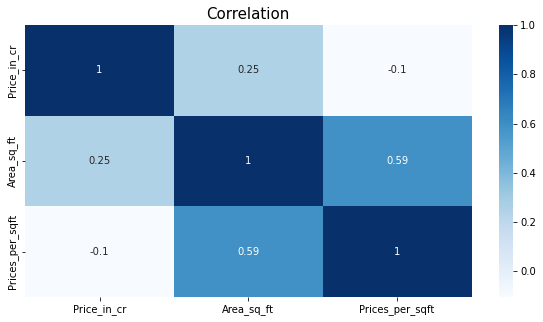

In [48]:
plt.figure(figsize=(10,5))
sns.heatmap(data[["Price_in_cr","Area_sq_ft","Prices_per_sqft"]].corr(),annot=True,cmap="Blues")
plt.title("Correlation",fontsize=15)
plt.show()

<AxesSubplot: >

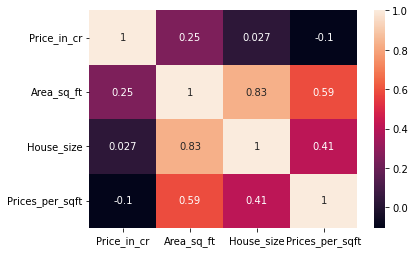

In [49]:
sns.heatmap(data.corr(),annot=True)

* Price and Price/sqft has low to medium level negative corrilation
* Price and House size has strong the corrilation
* Price and Area(sqft) has low tomedium level positive corrilation

#### Checking availability of House size in Building type of Location for Prices

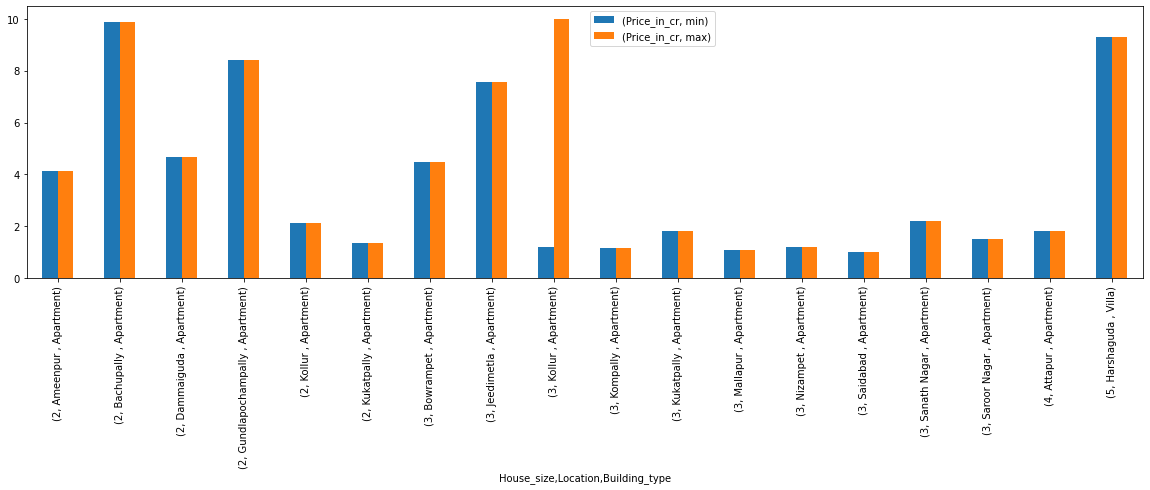

In [50]:
plt.rcParams["figure.figsize"]=(20,5)
data.groupby(["House_size","Location","Building_type"]).agg({"Price_in_cr":["min","max"]}).plot(kind="bar")
plt.legend(bbox_to_anchor=(0.5,1))
plt.show()

* Here Villa is available with 5bhk at Harshaguda with no minimum price 
* 3bhk appartment at Kollur showing minimum price is below 2 crores and maximum is above 8 crors

In [62]:
data.head(50)

,Building_Name,Building_type,Constructed_by,Price_in_cr,Location,Area_sq_ft,House_size,Prices_per_sqft,Building_Status
0,Vajra The Royal Park,Apartment,Vajra Builders And Developers,4.47,Bowrampet,1535,3,4200,Under Construction
1,Vasavi Signature,Apartment,Vasavi Group,1.82,Kukatpally,2285,3,8000,Ready to move
2,Riddhi Pramukh Elegance,Apartment,Riddhi Group,7.58,Jeedimetla,1510,3,5800,Under Construction
3,Theme Imperial,Apartment,Theme Ambience Infrastructures,1.80,Attapur,2655,4,6800,Under Construction
4,Signature Altius,Apartment,Signature Avenues,1.21,Kollur,2425,3,4999,Under Construction
5,Aavasa Constructions Emerald,Apartment,Aavasa Constructions,1.52,Saroor Nagar,2345,3,6500,Under Construction
6,Srija Twin Towers,Apartment,Srija Infra Developers Hyderabad,4.67,Dammaiguda,1139,2,4800,Under Construction
7,Cybercity Oriana,Apartment,Cyber City Oriana,1.35,Kukatpally,1450,2,9310,Under Construction
8,Primark De Stature,Apartment,Primark Projects Pvt Ltd,1.18,Kompally,1515,3,4699,Under Construction
9,Kalpataru Avante,Apartment,Kalpataru Group,2.19,Sanath Nagar,2294,3,9546,Under Construction


In [60]:
location=input("Enter location : ")
building_type=input("enter building type : ")
price=float(input("enter price : "))
a=data[(data["Location"]==location) & (data["Building_type"]==building_type) & (data["Price_in_cr"]==price)]
a

Enter location : Bowrampet 
enter building type : Apartment
enter price : 4.47


,Building_Name,Building_type,Constructed_by,Price_in_cr,Location,Area_sq_ft,House_size,Prices_per_sqft,Building_Status
0,Vajra The Royal Park,Apartment,Vajra Builders And Developers,4.47,Bowrampet,1535,3,4200,Under Construction
20,Vajra The Royal Park,Apartment,Vajra Builders And Developers,4.47,Bowrampet,1535,3,4200,Under Construction
40,Vajra The Royal Park,Apartment,Vajra Builders And Developers,4.47,Bowrampet,1535,3,4200,Under Construction
60,Vajra The Royal Park,Apartment,Vajra Builders And Developers,4.47,Bowrampet,1535,3,4200,Under Construction
80,Vajra The Royal Park,Apartment,Vajra Builders And Developers,4.47,Bowrampet,1535,3,4200,Under Construction
100,Vajra The Royal Park,Apartment,Vajra Builders And Developers,4.47,Bowrampet,1535,3,4200,Under Construction
120,Vajra The Royal Park,Apartment,Vajra Builders And Developers,4.47,Bowrampet,1535,3,4200,Under Construction
140,Vajra The Royal Park,Apartment,Vajra Builders And Developers,4.47,Bowrampet,1535,3,4200,Under Construction
160,Vajra The Royal Park,Apartment,Vajra Builders And Developers,4.47,Bowrampet,1535,3,4200,Under Construction
180,Vajra The Royal Park,Apartment,Vajra Builders And Developers,4.47,Bowrampet,1535,3,4200,Under Construction


In [56]:
data["Location"][0]

'Bowrampet '

In [58]:
data["Building_type"][0]

'Apartment'

In [59]:
data["Price_in_cr"][0]

4.47

In [63]:
data.head(1)

,Building_Name,Building_type,Constructed_by,Price_in_cr,Location,Area_sq_ft,House_size,Prices_per_sqft,Building_Status
0,Vajra The Royal Park,Apartment,Vajra Builders And Developers,4.47,Bowrampet,1535,3,4200,Under Construction


In [76]:
data[(data["Price_in_cr"]<1.5)& (data["House_size"]==3)&(data["Area_sq_ft"]<2000).head(30)]

,Building_Name,Building_type,Constructed_by,Price_in_cr,Location,Area_sq_ft,House_size,Prices_per_sqft,Building_Status
8,Primark De Stature,Apartment,Primark Projects Pvt Ltd,1.18,Kompally,1515,3,4699,Under Construction
17,Namishree BPS Twin Towers,Apartment,Namishree Infrastructure And Project Pvt Ltd,1.02,Saidabad,1705,3,6000,Under Construction
19,Vazhraa Vazhraa Prathik,Apartment,Vazhraa Nirmaan Pvt Ltd,1.21,Nizampet,1870,3,6500,Under Construction
28,Primark De Stature,Apartment,Primark Projects Pvt Ltd,1.18,Kompally,1515,3,4699,Under Construction
